# Homework 1

## Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## Read in the DataFrame and remove ignored attributes

In [2]:
df = pd.read_csv('./OnlineNewsPopularity.csv')

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df = df.drop(df.columns[list(range(0,2))],axis = 1).drop(df.columns[list(range(13,39))],axis = 1)

In [5]:
A = df.to_numpy()

In [6]:
A

array([[1.20000000e+01, 2.19000000e+02, 6.63594467e-01, ...,
        0.00000000e+00, 1.87500000e-01, 5.93000000e+02],
       [9.00000000e+00, 2.55000000e+02, 6.04743081e-01, ...,
        5.00000000e-01, 0.00000000e+00, 7.11000000e+02],
       [9.00000000e+00, 2.11000000e+02, 5.75129531e-01, ...,
        5.00000000e-01, 0.00000000e+00, 1.50000000e+03],
       ...,
       [1.00000000e+01, 4.42000000e+02, 5.16355139e-01, ...,
        4.54545455e-02, 1.36363636e-01, 1.90000000e+03],
       [6.00000000e+00, 6.82000000e+02, 5.39493293e-01, ...,
        5.00000000e-01, 0.00000000e+00, 1.10000000e+03],
       [1.00000000e+01, 1.57000000e+02, 7.01986750e-01, ...,
        1.66666667e-01, 2.50000000e-01, 1.30000000e+03]])

In [7]:
df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


## Mean vector and total variance

### Mean

In [8]:
mean = A.sum(axis=0) / A.shape[0]
mean

array([ 1.03987489e+01,  5.46514731e+02,  5.48215717e-01,  9.96468565e-01,
        6.89175394e-01,  1.08836898e+01,  3.29363838e+00,  4.54414287e+00,
        1.24987388e+00,  4.54823932e+00,  7.22376652e+00,  1.84599048e-01,
        1.41255773e-01,  2.16320967e-01,  2.23769617e-01,  2.34029371e-01,
        4.43370200e-01,  1.19309269e-01,  3.96248330e-02,  1.66121195e-02,
        6.82150221e-01,  2.87933524e-01,  3.53824943e-01,  9.54455381e-02,
        7.56727544e-01, -2.59524141e-01, -5.21943728e-01, -1.07500240e-01,
        2.82353184e-01,  7.14254320e-02,  3.41842756e-01,  1.56063663e-01,
        3.39538018e+03])

### Total Varianece

In [9]:
tot_var = np.sum((A-mean)**2) / A.shape[0]

In [10]:
tot_var

135404799.7377217

## Covariance matrix (inner and outer product form)

### inner product

In [11]:
inner_p_cov = (np.dot((A-mean).T,(A-mean))/A.shape[0])
inner_p_cov

array([[ 4.46903889e+00,  1.80854387e+01, -3.95820555e-02, ...,
        -5.86494607e-02,  1.93982451e-02,  2.15881875e+02],
       [ 1.80854387e+01,  2.21936686e+05, -7.85621983e+00, ...,
         6.34662705e-01,  1.43271448e+00,  1.34688547e+04],
       [-3.95820555e-02, -7.85621983e+00,  1.23950745e+01, ...,
        -6.14309369e-03, -3.35931915e-03,  3.30070096e+01],
       ...,
       [-5.86494607e-02,  6.34662705e-01, -6.14309369e-03, ...,
         3.56410689e-02, -1.71000855e-02,  3.25079931e+00],
       [ 1.93982451e-02,  1.43271448e+00, -3.35931915e-03, ...,
        -1.71000855e-02,  5.12077722e-02,  7.13940172e+01],
       [ 2.15881875e+02,  1.34688547e+04,  3.30070096e+01, ...,
         3.25079931e+00,  7.13940172e+01,  1.35182574e+08]])

### outer product

In [12]:
centered = (A-mean)
outer_product = sum([np.outer(centered[i], centered[i]) for i in range(centered.shape[0])]) / centered.shape[0]
outer_product

array([[ 4.46903889e+00,  1.80854387e+01, -3.95820555e-02, ...,
        -5.86494607e-02,  1.93982451e-02,  2.15881875e+02],
       [ 1.80854387e+01,  2.21936686e+05, -7.85621983e+00, ...,
         6.34662705e-01,  1.43271448e+00,  1.34688547e+04],
       [-3.95820555e-02, -7.85621983e+00,  1.23950745e+01, ...,
        -6.14309369e-03, -3.35931915e-03,  3.30070096e+01],
       ...,
       [-5.86494607e-02,  6.34662705e-01, -6.14309369e-03, ...,
         3.56410689e-02, -1.71000855e-02,  3.25079931e+00],
       [ 1.93982451e-02,  1.43271448e+00, -3.35931915e-03, ...,
        -1.71000855e-02,  5.12077722e-02,  7.13940172e+01],
       [ 2.15881875e+02,  1.34688547e+04,  3.30070096e+01, ...,
         3.25079931e+00,  7.13940172e+01,  1.35182574e+08]])

## Correlation matrix as pair-wise cosines

In [13]:
def magnitude(x):
    return np.sqrt(np.sum(np.square(x)))

In [14]:
magnitude(centered[0])

2821.4662615268817

In [15]:
def correlation(x,y):
    return np.dot(x.T,y)/(magnitude(x)*magnitude(y))

In [16]:
correlation_matrix = np.array([[correlation(i,j) for i in centered.T] for j in centered.T])

In [17]:
correlation_matrix

array([[ 1.00000000e+00,  1.81596482e-02, -5.31822498e-03, ...,
        -1.46954062e-01,  4.05496802e-02,  8.78311884e-03],
       [ 1.81596482e-02,  1.00000000e+00, -4.73668505e-03, ...,
         7.13597090e-03,  1.34393158e-02,  2.45898435e-03],
       [-5.31822498e-03, -4.73668505e-03,  1.00000000e+00, ...,
        -9.24245210e-03, -4.21656456e-03,  8.06345661e-04],
       ...,
       [-1.46954062e-01,  7.13597090e-03, -9.24245210e-03, ...,
         1.00000000e+00, -4.00271787e-01,  1.48099790e-03],
       [ 4.05496802e-02,  1.34393158e-02, -4.21656456e-03, ...,
        -4.00271787e-01,  1.00000000e+00,  2.71352310e-02],
       [ 8.78311884e-03,  2.45898435e-03,  8.06345661e-04, ...,
         1.48099790e-03,  2.71352310e-02,  1.00000000e+00]])

### Find the most correlated pairs
* set the diagnal to 0 to avoid finding itself as most correlated

In [18]:
def get_index(arg,matrix):
    row = arg//matrix.shape[0]
    col = arg%matrix.shape[0]
    return (row,col)

In [19]:
for i in range(correlation_matrix.shape[0]):
    correlation_matrix[i][i] = 0
most_corr_index = get_index(np.argmax(correlation_matrix),correlation_matrix)

In [20]:
f = f"The most correlated pair is {df.columns[most_corr_index[0]]} and {df.columns[most_corr_index[1]]}, the indecies are {most_corr_index[0]} and {most_corr_index[1]} respectively"
print(f)

The most correlated pair is  n_unique_tokens and  n_non_stop_unique_tokens, the indecies are 2 and 4 respectively


### Find the most anti correlated pairs

In [21]:
anti_corr_index = get_index(np.argmin(correlation_matrix),correlation_matrix)

In [22]:
f = f"The most anti-correlated pair is {df.columns[anti_corr_index[0]]} and {df.columns[anti_corr_index[1]]}, the indecies are {anti_corr_index[0]} and {anti_corr_index[1]} respectively"
print(f)

The most anti-correlated pair is  global_sentiment_polarity and  rate_negative_words, the indecies are 17 and 21 respectively


### Find the least correlated pairs
* To find the least correlated pairs, we need to take the absolute value of the matrix first

In [23]:
for i in range(correlation_matrix.shape[0]):
    correlation_matrix[i][i] = 1
correlation_matrix = np.abs(correlation_matrix)
least_corr_index = get_index(np.argmin(correlation_matrix),correlation_matrix)

In [24]:
f = f"The least correlated pair is {df.columns[least_corr_index[0]]} and {df.columns[least_corr_index[1]]}, the indecies are {least_corr_index[0]} and {least_corr_index[1]} respectively"
print(f)

The least correlated pair is  n_unique_tokens and  global_rate_positive_words, the indecies are 2 and 18 respectively


Text(0, 0.5, 'Attribute 4')

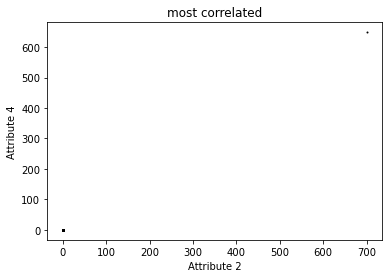

In [25]:
plt.plot(centered[:, most_corr_index[0]], centered[:, most_corr_index[1]], 'o', color='black', markersize=1)
plt.title("most correlated")
plt.xlabel('Attribute ' + str(most_corr_index[0]))
plt.ylabel('Attribute ' + str(most_corr_index[1]))

Text(0, 0.5, 'Attribute 18')

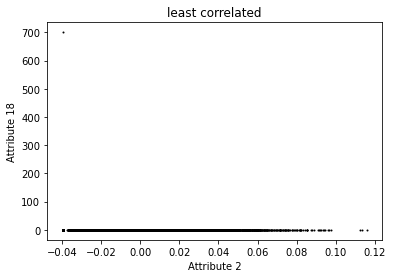

In [29]:
plt.plot(centered[:, least_corr_index[1]], centered[:, least_corr_index[0]], 'o', color='black', markersize=1)
plt.title("least correlated")
plt.xlabel('Attribute ' + str(least_corr_index[0]))
plt.ylabel('Attribute ' + str(least_corr_index[1]))

Text(0, 0.5, 'Attribute 21')

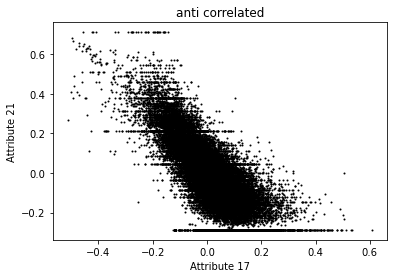

In [27]:
plt.plot(centered[:, anti_corr_index[0]], centered[:, anti_corr_index[1]], 'o', color='black', markersize=1)
plt.title("anti correlated")
plt.xlabel('Attribute ' + str(anti_corr_index[0]))
plt.ylabel('Attribute ' + str(anti_corr_index[1]))

In the three plots, The most correlated plot shows that the data are strongly positvely correlated with, which matches description (having highest value). The least correlated plot shows that the data are not correlated at all (nearly) for having a slope equal to 0, which also matches the description. The anti correlated plot shows that it has a stronly negative slope, which also matches the description.